# Loading, cleaning, and merging datasets

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
rentals1 = pd.read_csv('Indego_Trips_2015Q4.csv')
#print(rentals1.head(5))
rentals2 = pd.read_csv('Indego_Trips_2016Q1.csv')
#print(rentals2.head(5))
rentals3 = pd.read_csv('Indego_Trips_2016Q2.csv')
#print(rentals3.head(5))
rentals4 = pd.read_csv('Indego_Trips_2016Q3.csv')

rentals1['start_time'] = rentals1['start_time'].str.replace(r'\d+\s', '2015 ')
rentals1['end_time'] = rentals1['end_time'].str.replace(r'\d+\s', '2015 ')
print(rentals1.head(10))
rentals = rentals1.append(rentals2).append(rentals3).append(rentals4)
rentals.tail(5)

   trip_id  duration      start_time        end_time  start_station_id  \
0  4376433      1140  10/1/2015 0:04  10/1/2015 0:23              3041   
1  4376434       720  10/1/2015 0:08  10/1/2015 0:20              3045   
2  4376435       600  10/1/2015 0:27  10/1/2015 0:37              3060   
3  4376437       840  10/1/2015 0:36  10/1/2015 0:50              3052   
4  4376438       360  10/1/2015 0:37  10/1/2015 0:43              3017   
5  4376439       900  10/1/2015 0:49  10/1/2015 1:04              3047   
6  4376440      1680  10/1/2015 1:00  10/1/2015 1:28              3069   
7  4376441       240  10/1/2015 1:00  10/1/2015 1:04              3031   
8  4376442     23880  10/1/2015 1:14  10/1/2015 7:52              3056   
9  4376443       720  10/1/2015 1:32  10/1/2015 1:44              3059   

   start_lat  start_lon  end_station_id   end_lat   end_lon  bike_id  \
0   39.96849  -75.13546            3026  39.94138 -75.14564     3302   
1   39.94792  -75.16237            3026  

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
234941,55223960,660,9/30/2016 23:51,10/1/2016 0:02,3023.0,39.950481,-75.172859,3114,39.937752,-75.180122,6725,30,One Way,Indego30
234942,55223958,900,9/30/2016 23:53,10/1/2016 0:08,3032.0,39.945271,-75.17971,3011,39.960461,-75.197006,11031,30,One Way,Indego30
234943,55223957,540,9/30/2016 23:55,10/1/2016 0:04,3007.0,39.945171,-75.159927,3025,39.937241,-75.161201,2706,30,One Way,Indego30
234944,55223956,480,9/30/2016 23:56,10/1/2016 0:04,3007.0,39.945171,-75.159927,3025,39.937241,-75.161201,2497,30,One Way,Indego30
234945,55223955,480,9/30/2016 23:56,10/1/2016 0:04,3068.0,39.93549,-75.167107,3053,39.932308,-75.181541,5339,30,One Way,Indego30


In [26]:
rentals.head(5)

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,4376433,1140,10/1/2015 0:04,10/1/2015 0:23,3041.0,39.9685,-75.1355,3026,39.9414,-75.1456,3302,0,One Way,Walk-up
1,4376434,720,10/1/2015 0:08,10/1/2015 0:20,3045.0,39.9479,-75.1624,3026,39.9414,-75.1456,2605,30,One Way,Indego30
2,4376435,600,10/1/2015 0:27,10/1/2015 0:37,3060.0,39.9592,-75.1704,3075,39.9672,-75.1612,2532,30,One Way,Indego30
3,4376437,840,10/1/2015 0:36,10/1/2015 0:50,3052.0,39.9473,-75.1569,3068,39.9355,-75.1671,3715,30,One Way,Indego30
4,4376438,360,10/1/2015 0:37,10/1/2015 0:43,3017.0,39.98,-75.1437,3036,39.9684,-75.14,3279,30,One Way,Indego30


In [27]:
rentals.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station_id',
       'start_lat', 'start_lon', 'end_station_id', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')

In [28]:
stime = '(?P<hour>\d+):(?P<minute>\d+)'
stimes = rentals['start_time'].str.extract(stime, expand=True)
stimes.head(5)
etime = '(?P<hour>\d+):(?P<minute>\d+)'
etimes = rentals['end_time'].str.extract(etime, expand=True)
etimes.head(5)
rentals['start_hour']=stimes['hour'].astype(float)
rentals['end_hour']=etimes['hour'].astype(float)
rentals['count']=1

date = '(?P<month>\d+)/(?P<day>\d+)/(?P<year>\d+)'
dates = rentals['start_time'].str.extract(date, expand=True)
print(dates.dtypes)
rentals['date']=dates['year'].astype(str)+'-'+dates['month'].astype(str)+'-'+dates['day'].astype(str)

month    object
day      object
year     object
dtype: object


In [29]:
print(rentals.shape[0])
rentals.head(5)
rentals.tail(5)

600722


,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_hour,end_hour,count,date
234941,55223960,660,9/30/2016 23:51,10/1/2016 0:02,3023.0,39.950481,-75.172859,3114,39.937752,-75.180122,6725,30,One Way,Indego30,23.0,0.0,1,2016-9-30
234942,55223958,900,9/30/2016 23:53,10/1/2016 0:08,3032.0,39.945271,-75.17971,3011,39.960461,-75.197006,11031,30,One Way,Indego30,23.0,0.0,1,2016-9-30
234943,55223957,540,9/30/2016 23:55,10/1/2016 0:04,3007.0,39.945171,-75.159927,3025,39.937241,-75.161201,2706,30,One Way,Indego30,23.0,0.0,1,2016-9-30
234944,55223956,480,9/30/2016 23:56,10/1/2016 0:04,3007.0,39.945171,-75.159927,3025,39.937241,-75.161201,2497,30,One Way,Indego30,23.0,0.0,1,2016-9-30
234945,55223955,480,9/30/2016 23:56,10/1/2016 0:04,3068.0,39.93549,-75.167107,3053,39.932308,-75.181541,5339,30,One Way,Indego30,23.0,0.0,1,2016-9-30


364
count     364.000000
mean     1650.335165
std       811.958014
min         1.000000
25%       955.750000
50%      1639.500000
75%      2351.250000
max      3679.000000
Name: count, dtype: float64


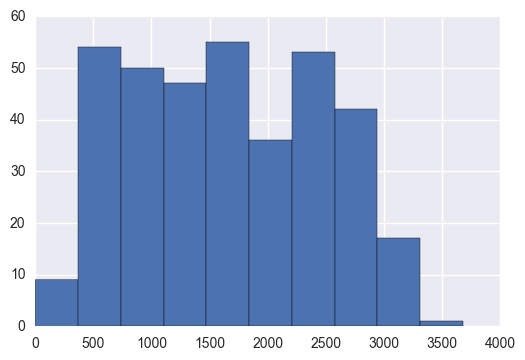

In [30]:
rentals_countt = rentals.groupby('date', as_index=False).sum()
rentals_count = rentals_countt[['date','count']]
rentals_count.head(20)
print(rentals_count.shape[0])
sns.plt.hist(rentals_count['count'])
# Total number of docks is 1995
print(rentals_count['count'].describe())

In [31]:
from urllib.request import Request, urlopen
import json
req = Request('https://www.rideindego.com/stations/json/', headers={'User-Agent': 'Mozilla/5.0'})
data = urlopen(req).read().decode('utf-8')
feed = json.loads(data)
nstations = len(feed['features'])
td = [feed['features'][i]['properties']['totalDocks'] for i in range(0,nstations)]
station_id = [feed['features'][i]['properties']['kioskId'] for i in range(0,nstations)]
print(td, station_id)
station_info=pd.DataFrame({'station': station_id, 'total_docks':td})
print(station_info.head(5))
print(station_info['total_docks'].sum())

[25, 13, 17, 15, 19, 14, 19, 8, 27, 15, 25, 11, 15, 15, 18, 15, 35, 34, 21, 21, 19, 15, 17, 15, 15, 17, 29, 21, 17, 20, 16, 20, 15, 21, 19, 19, 21, 19, 18, 15, 11, 20, 29, 15, 25, 25, 19, 15, 15, 23, 23, 13, 21, 19, 25, 15, 25, 15, 15, 19, 17, 18, 23, 19, 13, 25, 15, 15, 12, 19, 18, 21, 20, 21, 22, 19, 23, 19, 19, 23, 18, 26, 22, 13, 19, 23, 23, 22, 19, 19, 19, 18, 18, 17, 23, 19, 23, 17, 23, 18, 16, 19, 23, 19, 19] [3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3043, 3045, 3046, 3047, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3077, 3078, 3086, 3088, 3093, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3117, 311

In order to predict station popularity by hour, we want to make a new df with stations, hours, and counts of rentals at those hours.

In [32]:
weather=pd.read_csv('Weather_Oct_Oct.csv')
print(weather.columns)
weather.tail(5)

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')


,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
361,2016-9-26,73,60,48,59,51,46,93,68,44,...,10,10,10,10,4,NaN,0.00,4,NaN,132
362,2016-9-27,77,70,61,65,59,49,93,74,37,...,10,10,6,10,5,NaN,0.08,4,Rain,260
363,2016-9-28,72,62,53,64,59,51,97,85,73,...,10,8,2,23,8,29.0,0.01,5,Rain,73
364,2016-9-29,64,62,59,62,60,57,97,92,90,...,10,6,2,22,17,32.0,0.41,8,Rain,72
365,2016-9-30,64,60,57,60,58,55,93,91,84,...,10,6,2,22,16,31.0,0.57,8,Rain,53


## With the two data frames, merge them based on date

In [33]:
# do the same for the weather
weather_day = weather[['EDT','Mean TemperatureF',' Mean Humidity',' Mean Wind SpeedMPH','MeanDew PointF',\
                       ' Mean Sea Level PressureIn',' Mean VisibilityMiles',' Events']]
weather_day.columns = ['date','mean temp','mean hum','mean wind','mean dew','mean pressure',\
                      'mean visib','Events']

# merge based on date
weather_rental = pd.merge(rentals_count, weather_day, how='left', on='date')
weather_rental.fillna('None', inplace=True)
weather_rental.tail(20)

,date,count,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,Events
344,2016-9-19,1527,74,91,5,70,30.04,8,Rain
345,2016-9-2,3059,72,59,9,56,30.08,10,None
346,2016-9-20,3032,74,83,5,68,30.12,7,None
347,2016-9-21,3154,74,74,2,63,30.16,9,None
348,2016-9-22,3070,74,58,4,55,30.14,10,None
349,2016-9-23,3108,74,64,2,59,30.03,10,None
350,2016-9-24,3679,66,70,9,55,30.11,10,None
351,2016-9-25,2506,60,53,7,43,30.19,10,None
352,2016-9-26,2856,60,68,4,51,30.13,10,None
353,2016-9-27,2869,70,74,5,59,29.95,10,Rain


## Now calculate classifier for bike demand low = 0, or fair = 1, busy = 2, very busy = 3

In [34]:
stats=rentals_count['count'].describe()

def is_busy(row):
    stats=rentals_count['count'].describe()
    #if bikes parked at that station at that hour is greater, we know station is mostly full (so not busy)
    if row['count'] <= stats['25%']:
        return 0
    elif row['count'] > stats['25%'] and row['count'] <= stats['50%']:
        return 1
    elif row['count'] > stats['50%'] and row['count'] <= stats['75%']:
        return 2
    else:
        return 3
        
weather_rental['is_busy'] = weather_rental.apply(is_busy, axis=1)
weather_rental.head(5)

,date,count,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,Events,is_busy
0,2015-10-1,1247,60,68,15,49,30.07,9,Rain,1
1,2015-10-10,1974,58,53,9,39,30.10,10,None,2
2,2015-10-11,1798,56,62,2,42,29.99,10,None,2
3,2015-10-12,2120,60,60,2,45,29.84,9,None,2
4,2015-10-13,2077,65,66,5,54,29.61,10,None,2


In [35]:
weather_rental.to_csv('weather_rental.csv', index=False)

### Now we have a clean dataframe with the date, weather info, hour, and bike rental counts

# Time to train and predict

In [36]:
train = weather_rental.sample(frac=.8)
test = weather_rental.loc[~weather_rental.index.isin(train.index)]
test.head(3)

,date,count,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,Events,is_busy
1,2015-10-10,1974,58,53,9,39,30.10,10,None,2
2,2015-10-11,1798,56,62,2,42,29.99,10,None,2
4,2015-10-13,2077,65,66,5,54,29.61,10,None,2


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

predictors = list(weather_rental.columns)
predictors.remove('date')
predictors.remove('count')
predictors.remove('is_busy')
predictors.remove('Events')

reg = RandomForestClassifier(n_estimators=10, max_depth=None, \
                            min_samples_split=10, min_samples_leaf=5, max_features='auto')
reg.fit(train[predictors], train['is_busy'])

pred = reg.predict(test[predictors])
mse = mean_squared_error(test['is_busy'],pred)
print(mse)

print (pred[:15])
print (test['is_busy'].iloc[:15])
test.head(15)

0.342465753425
[2 1 2 1 1 2 2 2 1 1 1 0 1 1 0]
1     2
2     2
4     2
9     1
10    2
14    2
17    1
38    2
42    2
44    1
45    1
46    1
59    1
60    2
66    1
Name: is_busy, dtype: int64


,date,count,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,Events,is_busy
1,2015-10-10,1974,58,53,9,39,30.10,10,None,2
2,2015-10-11,1798,56,62,2,42,29.99,10,None,2
4,2015-10-13,2077,65,66,5,54,29.61,10,None,2
9,2015-10-18,1092,44,49,6,24,30.32,10,None,1
10,2015-10-19,1641,42,52,4,26,30.44,10,None,2
14,2015-10-22,2153,60,57,4,45,30.19,9,None,2
17,2015-10-25,1468,61,62,7,48,30.13,10,Rain,1
38,2015-11-16,1691,57,49,6,35,30.26,10,None,2
42,2015-11-2,1725,55,74,2,47,30.10,9,None,2
44,2015-11-21,1168,45,58,7,31,30.17,10,None,1


# Pull weather data for today and predict for this hour

In [38]:
req = Request('http://api.wunderground.com/api/1e806efcbfa974b3/geolookup/conditions/q/PA/Philadelphia.json')
data = urlopen(req).read().decode('utf-8')
feed = json.loads(data)

print (feed['location']['city'])
print (feed['current_observation']['temp_f'])
print (feed['current_observation']['wind_mph'])
print (feed['current_observation']['relative_humidity'])


#weather_day.columns = ['date','mean temp','mean hum','mean wind','mean dew','mean pressure',\
                      #'mean visib']
print(predictors)

import re
re=re.findall(r'\d+', feed['current_observation']['relative_humidity'])
temp=feed['current_observation']['temp_f']
wind=feed['current_observation']['wind_mph']
dew=feed['current_observation']['dewpoint_f']
pressure=feed['current_observation']['pressure_in']
visibility=feed['current_observation']['visibility_mi']
hum=float(re[0])
hour=20.0

data=[[temp,hum,wind,dew,pressure,visibility]]
#today = pd.DataFrame(data,columns=predictors)

#print(today)
reg.predict(data)

Philadelphia
68.7
4.2
73%
['mean temp', 'mean hum', 'mean wind', 'mean dew', 'mean pressure', 'mean visib']


array([3])

In [39]:
testread=pd.read_csv('weather_rental.csv')
print(testread.columns)

Index(['date', 'count', 'mean temp', 'mean hum', 'mean wind', 'mean dew',
       'mean pressure', 'mean visib', 'Events', 'is_busy'],
      dtype='object')


# Further practice and analysis - Visualizing with d3.js

In [40]:
weather_rental.head(10)

,date,count,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,Events,is_busy
0,2015-10-1,1247,60,68,15,49,30.07,9,Rain,1
1,2015-10-10,1974,58,53,9,39,30.10,10,None,2
2,2015-10-11,1798,56,62,2,42,29.99,10,None,2
3,2015-10-12,2120,60,60,2,45,29.84,9,None,2
4,2015-10-13,2077,65,66,5,54,29.61,10,None,2
5,2015-10-14,2083,62,56,8,44,29.80,10,None,2
6,2015-10-15,1935,57,55,6,40,30.00,10,None,2
7,2015-10-16,2006,57,53,6,38,30.02,10,None,2
8,2015-10-17,1456,50,48,8,29,30.16,10,None,1
9,2015-10-18,1092,44,49,6,24,30.32,10,None,1


We want to wrangle the data again, for a more simple format to feed into d3

In [41]:
weather_simple = weather_rental;
date = '(?P<year>\d+)-(?P<month>\d+)-(?P<day>\d+)'
extract_date = weather_simple['date'].str.extract(date, expand=True)
weather_simple['year']=extract_date['year']
weather_simple['month']=extract_date['month']
weather_simple['day']=extract_date['day']
weather_simple.head(5)

cols_toprint=['year','month','day','count']
pr = weather_simple[cols_toprint]
pr.to_csv('weather_d3.csv', index=False)
pr.head(5)

,year,month,day,count
0,2015,10,1,1247
1,2015,10,10,1974
2,2015,10,11,1798
3,2015,10,12,2120
4,2015,10,13,2077


In [42]:
pr_bymonth = pr.groupby('month',as_index=False).sum()
pr_bymonth['month']=pr_bymonth['month'].astype(int)
pr_bymonth.sort_values(by=['month'], ascending=True, inplace=True)
pr_bymonth['month']=pr_bymonth['month'].astype(str)
label = {'1': 'Jan', '2': 'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct',\
        '11':'Nov','12':'Dec'}
pr_bymonth['month']=pr_bymonth['month'].map(label)
pr_bymonth.columns=['label','count']
pr_bymonth.to_csv('weather_d3_bymonth.csv', index=False)

In [45]:
pr_bymonth

,label,count
0,Jan,17781
4,Feb,19285
5,Mar,36103
6,Apr,42324
7,May,55922
8,Jun,72578
9,Jul,76662
10,Aug,78131
11,Sep,80153
1,Oct,53381


In [71]:
cols_toprint=['month','day','mean temp']
pr2_bymonth = weather_simple[cols_toprint]
pr2_bymonth['month']=pr2_bymonth['month'].astype(int)
pr2_bymonth['day']=pr2_bymonth['day'].astype(int)
print(pr2_bymonth.dtypes)
pr2_bymonth.sort_values(['month','day'], ascending=[True,True], inplace=True)
#pr2_bymonth['month']=pr2_bymonth['month'].astype(str)
#label = {'1': 'Jan', '2': 'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct',\
#        '11':'Nov','12':'Dec'}
#pr2_bymonth['month']=pr2_bymonth['month'].map(label)
#pr2_bymonth.columns=['label','count']
pr2_bymonth.reset_index(drop=True, inplace=True)
print(pr2_bymonth)
pr2_bymonth.to_csv('monthly_temp_d3.csv',index=False)

month        int64
day          int64
mean temp    int64
dtype: object
     month  day  mean temp
0        1    1         38
1        1    2         36
2        1    3         37
3        1    4         26
4        1    5         21
5        1    6         28
6        1    7         34
7        1    8         39
8        1    9         46
9        1   10         54
10       1   11         30
11       1   12         32
12       1   13         24
13       1   14         34
14       1   15         40
15       1   16         47
16       1   17         34
17       1   18         24
18       1   19         22
19       1   20         29
20       1   21         32
21       1   22         24
22       1   25         28
23       1   26         34
24       1   27         37
25       1   28         32
26       1   29         34
27       1   30         33
28       1   31         42
29       2    1         52
..     ...  ...        ...
334     12    2         56
335     12    3         48
336     12 

/Users/HyunJooHwang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/HyunJooHwang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyunJooHwang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h